# 1. Stable Diffusion을 통한 super-resolution (4X Scaling)
- HuggingFace ldm-super-resolution-4x-openimages pretrained model 사용
 - https://huggingface.co/CompVis/ldm-super-resolution-4x-openimages
- img_path 수정 후 사용 해 보자


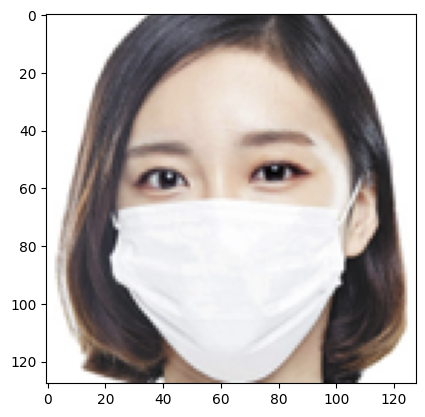

In [ ]:
import requests
from PIL import Image
import matplotlib.pyplot as plt

img_path = "/content/drive/MyDrive/Colab Notebooks/deepdaiv/data/test_mask2.png"
save_folder = "/content/drive/MyDrive/Colab Notebooks/deepdaiv/data/"

# requests.get 대신 Image.open을 사용하여 이미지 로드
low_res_image = Image.open(img_path).convert("RGB")
low_res_image = low_res_image.resize((128, 128))
low_res_image.save(save_folder+"128x128.png")

image = Image.open(save_folder+"128x128.png").convert("RGB")
plt.imshow(image)
plt.show()

In [ ]:
!pip install git+https://github.com/huggingface/diffusers.git

from io import BytesIO
from diffusers import LDMSuperResolutionPipeline
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
model_id = "CompVis/ldm-super-resolution-4x-openimages"

# load model and scheduler
pipeline = LDMSuperResolutionPipeline.from_pretrained(model_id)
pipeline = pipeline.to(device)

# let's download an image
# url = "https://user-images.githubusercontent.com/38061659/199705896-b48e17b8-b231-47cd-a270-4ffa5a93fa3e.png"
# response = requests.get(url)
# low_res_img = Image.open(BytesIO(response.content)).convert("RGB")
# low_res_img = low_res_img.resize((128, 128))

img_path = "/content/drive/MyDrive/Colab Notebooks/deepdaiv/data/128x128.png"
# requests.get 대신 Image.open을 사용하여 이미지 로드
low_res_image = Image.open(img_path).convert("RGB")

# run pipeline in inference (sample random noise and denoise)
upscaled_image = pipeline(low_res_image, num_inference_steps=100, eta=1).images[0]
# save image
upscaled_image.save(save_folder+"ldm_generated_image.png")

  Cloning https://github.com/huggingface/diffusers.git to /tmp/pip-req-build-5dysg1v3
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers.git /tmp/pip-req-build-5dysg1v3
  Resolved https://github.com/huggingface/diffusers.git to commit 3a7e481611bc299416aaeed4207086d9ddca5852
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.27.0.dev0-py3-none-any.whl size=1948688 sha256=77598201e0eeda468f5db6d2fea8506a68738919c5a46b6af8558a3cc873dbe4
  Stored in directory: /tmp/pip-ephem-wheel-cache-vf42plj0/wheels/4d/b7/a8/6f9549ceec5daad78675b857ac57d697c387062506520a7b50
Successfully built diffusers


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/248 [00:00<?, ?B/s]

vqvae/diffusion_pytorch_model.safetensors not found


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/221M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/455M [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/286 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/873 [00:00<?, ?B/s]

vqvae/config.json:   0%|          | 0.00/713 [00:00<?, ?B/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/3 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/diffusers/models/lora.py:384: FutureWarning: `LoRACompatibleLinear` is deprecated and will be removed in version 1.0.0. Use of `LoRACompatibleLinear` is deprecated. Please switch to PEFT backend by installing PEFT: `pip install peft`.
  deprecate("LoRACompatibleLinear", "1.0.0", deprecation_message)
/usr/local/lib/python3.10/dist-packages/diffusers/models/lora.py:300: FutureWarning: `LoRACompatibleConv` is deprecated and will be removed in version 1.0.0. Use of `LoRACompatibleConv` is deprecated. Please switch to PEFT backend by installing PEFT: `pip install peft`.
  deprecate("LoRACompatibleConv", "1.0.0", deprecation_message)


  0%|          | 0/100 [00:00<?, ?it/s]

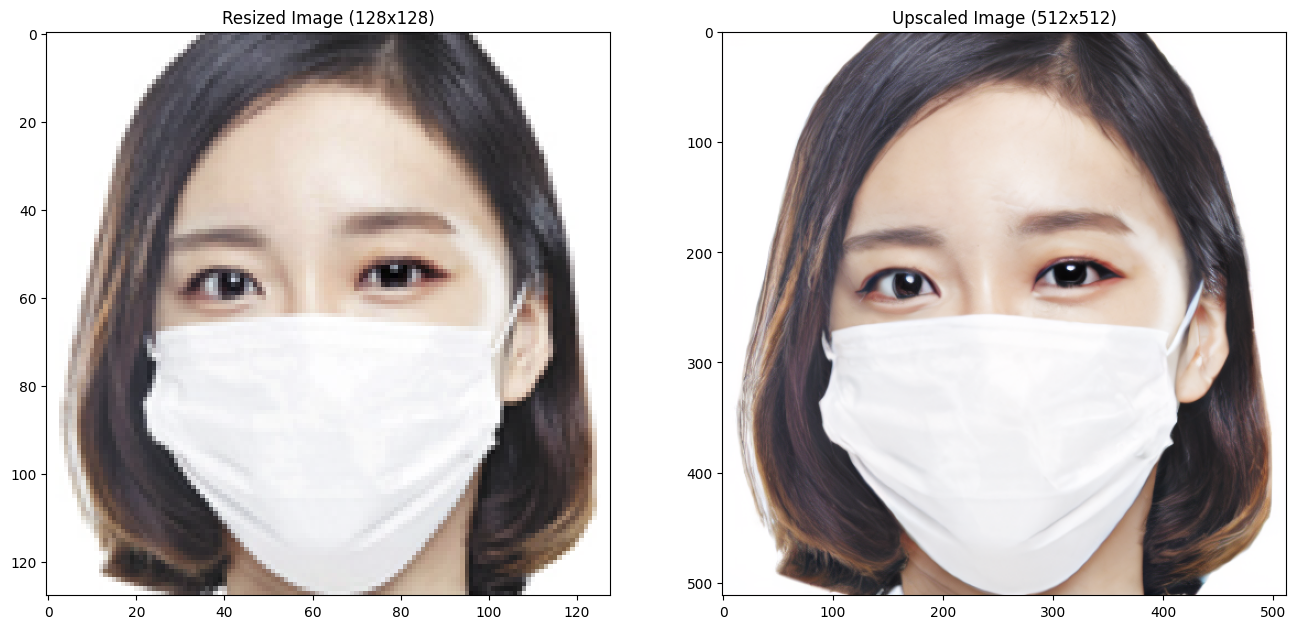

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# 이미지 파일 경로 설정
resized_img_path = save_folder + "128x128.png"  # 리사이즈된 이미지 파일 경로
upscaled_img_path = save_folder + "ldm_generated_image.png"  # 업스케일링된 이미지 파일 경로

# 이미지 로드
resized_img = Image.open(resized_img_path)
upscaled_img = Image.open(upscaled_img_path)

# 이미지 출력
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(resized_img)
plt.title("Resized Image (128x128)")

plt.subplot(1, 2, 2)
plt.imshow(upscaled_img)
plt.title("Upscaled Image (512x512)")

plt.show()


# 2. Segment Anything Model을 통한 mask segmentation
- HuggingFace facebook/sam-vit-huge 사용
 - RAM base, large 모델도 있는데 잘 안나와서 결제 후 Huge 사용..(시간은 괜찮은데 램이 부족하다)
- Face mask가 위치할 만한 점 3개를 input point prompt로 적용
- bounding box 또는 single point로도 가능하다

In [ ]:
from PIL import Image
import requests
from transformers import SamModel, SamProcessor

model = SamModel.from_pretrained("facebook/sam-vit-huge").to("cuda")
processor = SamProcessor.from_pretrained("facebook/sam-vit-huge")

import numpy as np
# 로컬 파일 경로
img_path = "/content/drive/MyDrive/Colab Notebooks/deepdaiv/data/ldm_generated_image.png"

resize = 512
# requests.get 대신 Image.open을 사용하여 이미지 로드
raw_image = Image.open(img_path).convert("RGB")
raw_image = raw_image.resize((resize, resize))

# input_points 정의
input_points = [[[resize * (4 / 12), resize * (7 / 12)],  \
                [resize * (6 / 12), resize * (10 / 12)],  \
                [resize * (8 / 12), resize * (7 / 12)]]]

# input_boxes = [[[50,128],[450, 450]]]
inputs = processor(raw_image, input_points=input_points, return_tensors="pt").to("cuda")
# inputs = processor(raw_image, input_boxes=input_boxes, return_tensors="pt").to("cuda")
outputs = model(**inputs)
masks = processor.image_processor.post_process_masks(outputs.pred_masks.cpu(), inputs["original_sizes"].cpu(), inputs["reshaped_input_sizes"].cpu())
scores = outputs.iou_scores



config.json:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.56G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

In [ ]:
import torch
from torchvision.utils import save_image

# bool을 float으로 변환 (True는 1.0, False는 0.0으로 변환됨)
mask = masks[0][0][0].float() # RGBA -> RGB -> binary
save_image(mask, save_folder+'mask_img.png')

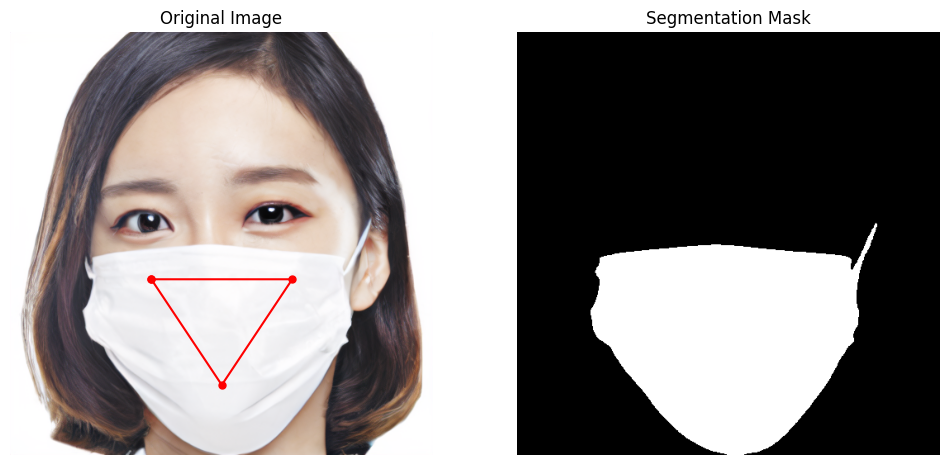

In [ ]:
# 예제 코드 수정: 단일 채널 마스크 시각화
import matplotlib.pyplot as plt

# 원본 이미지와 마스크 이미지를 나란히 표시
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# 원본 이미지 표시
axs[0].imshow(raw_image)
axs[0].set_title('Original Image')
axs[0].axis('off')

# 입력 포인트를 이미지 위에 표시
for points in input_points:
    # 각 점을 차례로 연결하여 다각형을 그립니다.
    poly = np.array(points)  # 점들의 배열을 numpy 배열로 변환
    poly = np.append(poly, [poly[0]], axis=0)  # 첫 번째 점을 다시 추가하여 다각형을 닫습니다.
    axs[0].plot(poly[:, 0], poly[:, 1], marker='o', markersize=5, linestyle='-', color='red')  # 다각형 그리기

# 마스크 시각화
axs[1].imshow(mask, cmap='gray')
axs[1].set_title('Segmentation Mask')
axs[1].axis('off')

plt.show()


# 3. Stable diffusion을 통한 image inpainting (미완성)
- Huggingface stable diffusion 사용 (여러 inpainting용 pretrained weight 사용 중..)
  - Repainting 논문
    - https://huggingface.co/docs/diffusers/v0.11.0/en/api/pipelines/repaint
    - https://openaccess.thecvf.com/content/CVPR2022/papers/Lugmayr_RePaint_Inpainting_Using_Denoising_Diffusion_Probabilistic_Models_CVPR_2022_paper.pdf
  - 기타
    - https://github.com/Stability-AI/stablediffusion
    - https://huggingface.co/stabilityai/stable-diffusion-2-inpainting#examples
    - https://huggingface.co/docs/diffusers/v0.11.0/en/api/pipelines/repaint

    얼굴 이상하게 나옴 ㅠ
    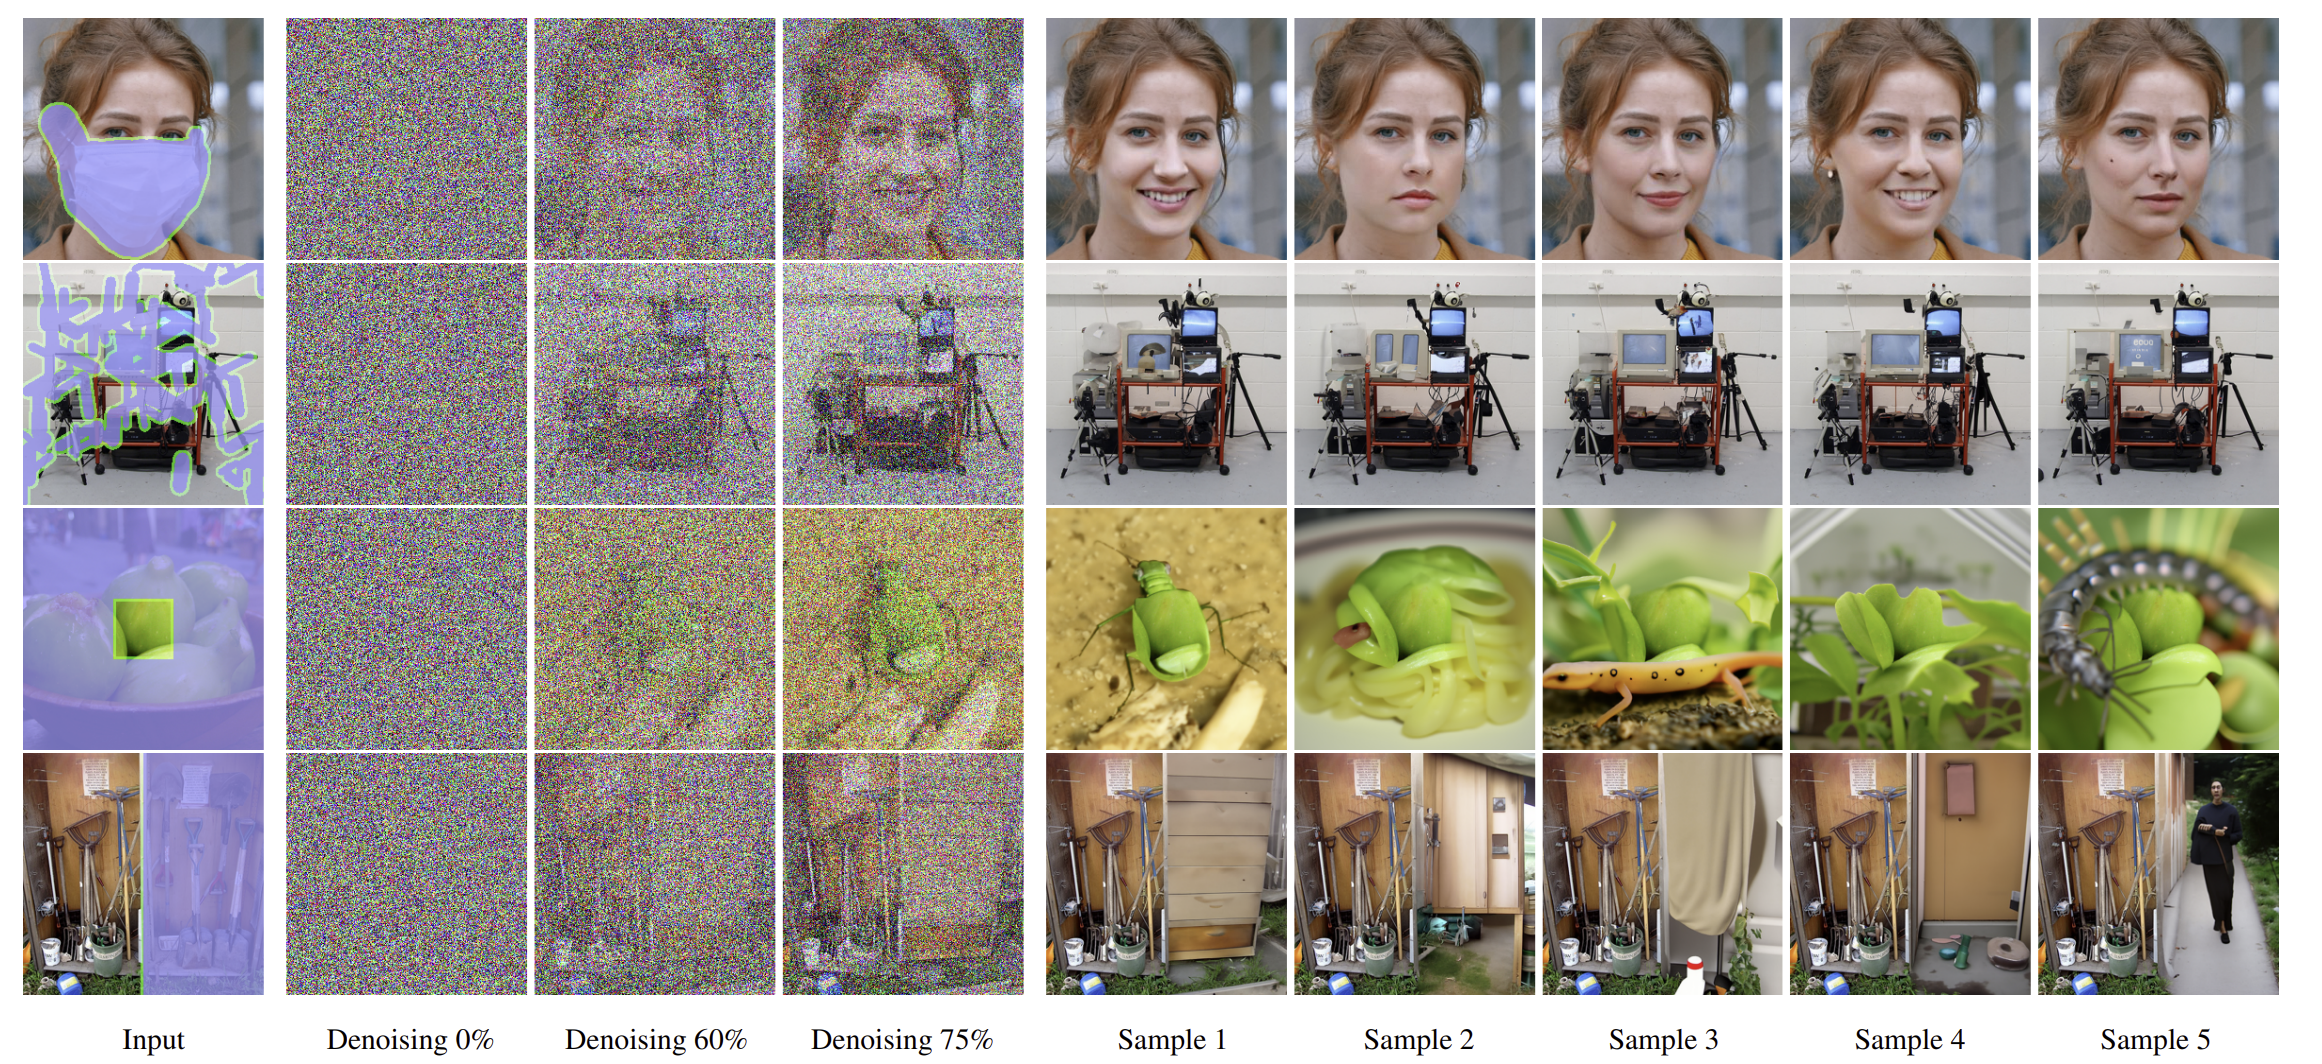

In [ ]:
from io import BytesIO
import torch
import PIL
import requests
from diffusers import RePaintPipeline, RePaintScheduler
from PIL import Image, ImageOps

# def download_image(url):
#     response = requests.get(url)
#     return PIL.Image.open(BytesIO(response.content)).convert("RGB")


# img_url = "https://huggingface.co/datasets/hf-internal-testing/diffusers-images/resolve/main/repaint/celeba_hq_256.png"
# mask_url = "https://huggingface.co/datasets/hf-internal-testing/diffusers-images/resolve/main/repaint/mask_256.png"

# # Load the original image and the mask as PIL images
# original_image = download_image(img_url).resize((256, 256))
# mask_image = download_image(mask_url).resize((256, 256))

resize = 256

img_path = "/content/drive/MyDrive/Colab Notebooks/deepdaiv/data/ldm_generated_image.png"
mask_img_path = "/content/drive/MyDrive/Colab Notebooks/deepdaiv/data/mask_img.png"

original_image = Image.open(img_path).convert("RGB").resize((resize, resize))
mask_image = Image.open(mask_img_path).convert("RGB").resize((resize, resize))
mask_image = ImageOps.invert(mask_image) # 코드 만든사람이 뒤집으라고 만든듯..

# Load the RePaint scheduler and pipeline based on a pretrained DDPM model
scheduler = RePaintScheduler.from_pretrained("google/ddpm-ema-celebahq-256")
pipe = RePaintPipeline.from_pretrained("google/ddpm-ema-celebahq-256", scheduler=scheduler)
pipe = pipe.to("cuda")

generator = torch.Generator(device="cuda").manual_seed(1234)
output = pipe(
    image=original_image,
    mask_image=mask_image,
    num_inference_steps=1000,
    eta=0.5, # noise
    jump_length=10,
    jump_n_sample=10,
    generator=generator,
)
inpainted_image = output.images[0]



diffusion_pytorch_model.safetensors not found
Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/18820 [00:00<?, ?it/s]

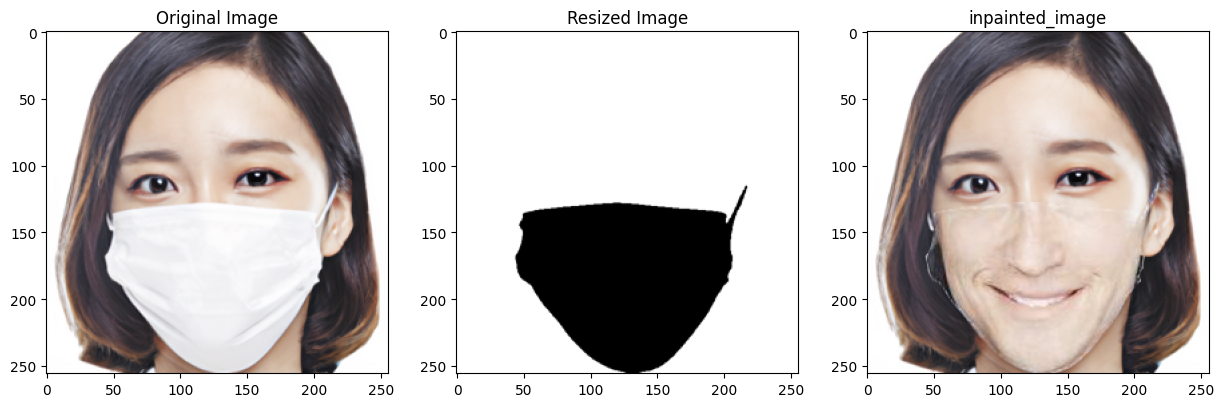

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

# # 이미지 파일 경로 설정
# original_img_path ="/content/ldm_generated_image.png"
# resized_img_path = "/content/mask_img.png"
# upscaled_img_path = "/content/inpainted_img_4.png"

# # 이미지 로드
# original_img = Image.open(original_img_path)
# resized_img = Image.open(resized_img_path)
# upscaled_img = Image.open(upscaled_img_path)

# 이미지 출력
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(original_image)
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(mask_image)
plt.title("Resized Image")

plt.subplot(1, 3, 3)
plt.imshow(inpainted_image)
plt.title("inpainted_image")

plt.show()


In [ ]:
from diffusers import AutoPipelineForInpainting
from diffusers.utils import load_image
import torch

pipe = AutoPipelineForInpainting.from_pretrained("diffusers/stable-diffusion-xl-1.0-inpainting-0.1", torch_dtype=torch.float16, variant="fp16").to("cuda")

img_path = "/content/ldm_generated_image.png"
mask_img_path = "/content/mask_img.png"

image = Image.open(img_path).convert("RGB").resize((512, 512))
mask_image = Image.open(mask_img_path).convert("RGB").resize((512, 512))


In [ ]:
import torch
from torchvision.utils import save_image
from PIL import Image
from diffusers import StableDiffusionInpaintPipeline
pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-inpainting",
    torch_dtype=torch.float16,
)
pipe.to("cuda")

img_path = "/content/ldm_generated_image.png"
mask_img_path = "/content/mask_img.png"

image = Image.open(img_path).convert("RGB").resize((512, 512))
mask_image = Image.open(mask_img_path).convert("RGB").resize((512, 512))

prompt = "the lower part of a person"

#image and mask_image should be PIL images.
#The mask structure is white for inpainting and black for keeping as is
image = pipe(prompt=prompt, image=image, mask_image=mask_image).images[0]
image.save("./yellow_cat_on_park_bench.png")

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:

# image = load_image(img_url).resize((512, 512))
# mask_image = load_image(mask_url).resize((512, 512))

prompt = "the lower part of a person"

generator = torch.Generator(device="cuda").manual_seed(0)

image = pipe(
  prompt=prompt,
  image=image,
  mask_image=mask_image,
  guidance_scale=8.0,
  num_inference_steps=20,  # steps between 15 and 30 work well for us
  strength=0.99,  # make sure to use `strength` below 1.0
  generator=generator,
).images[0]


  0%|          | 0/50 [00:00<?, ?it/s]

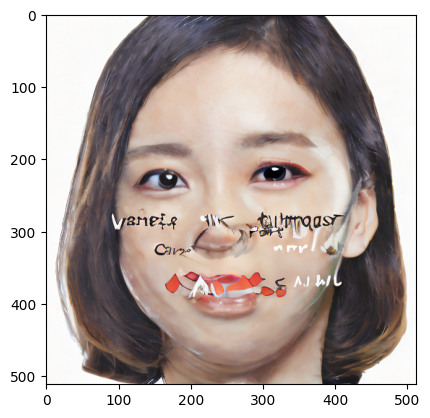

In [ ]:
import matplotlib.pyplot as plt
prompt = "a girl"

#image and mask_image should be PIL images.
#The mask structure is white for inpainting and black for keeping as is
image = pipe(prompt=prompt, image=image, mask_image=mask_image).images[0]

plt.imshow(image)
plt.show()